# Objective

Find most effective format which can effectively run embedded in browser, and can be run even on edge device.

In [11]:
from tensorflow.keras.models import load_model
import tensorflowjs as tfjs
from keras.models import load_model
from tensorflow.saved_model import save
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_resnet_v2 import preprocess_input
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [12]:
# loading keras model
print("loading keras model")
keras_model = load_model('output/inceptionResNetV2-iteration-3.keras')

# Saving model in saved model format
print("loading saved model format")
save(keras_model, 'output/inceptionResNetV2-iteration-3-saved-model')

print("converting to tfjs format")
# convert keras model to tfjs format
tfjs.converters.convert_tf_saved_model('output/inceptionResNetV2-iteration-3-saved-model', 'output/inceptionResNetV2-iteration-3-js')

loading keras model


2024-03-18 17:26:51.718640: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-18 17:26:51.863343: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-18 17:26:51.863650: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-18 17:26:51.865080: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-18 17:26:51.865263: I external/local_xla/xla/stream_executor

loading saved model format
INFO:tensorflow:Assets written to: output/inceptionResNetV2-iteration-3-saved-model/assets


INFO:tensorflow:Assets written to: output/inceptionResNetV2-iteration-3-saved-model/assets


converting to tfjs format


2024-03-18 17:28:04.853811: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-18 17:28:04.853858: I tensorflow/core/grappler/devices.cc:66] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 1
2024-03-18 17:28:04.853998: I tensorflow/core/grappler/clusters/single_machine.cc:361] Starting new session
2024-03-18 17:28:04.854590: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-18 17:28:04.854826: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-18 17:28:04.855020: I external/local_xla/xl

# Testing Loaded Saved Model on Real Image From Web

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


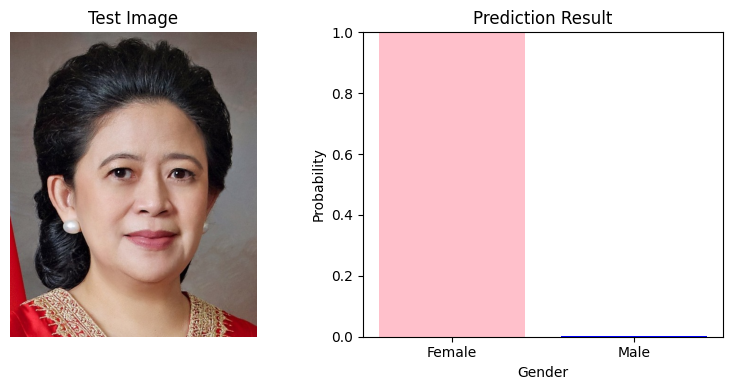

Model predicts: Female
Predictions: [[0.00338793]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


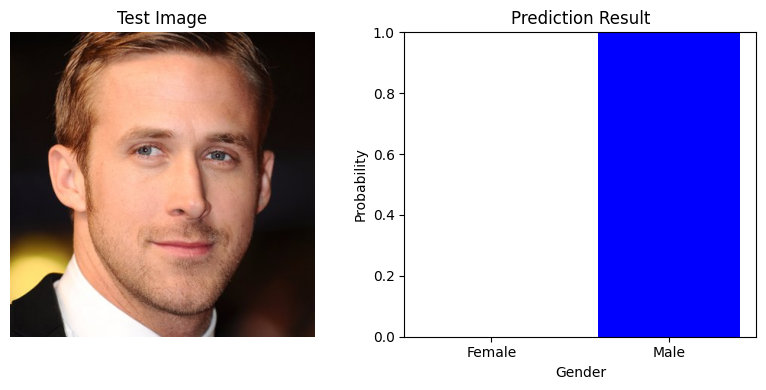

Model predicts: Male
Predictions: [[0.9995317]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


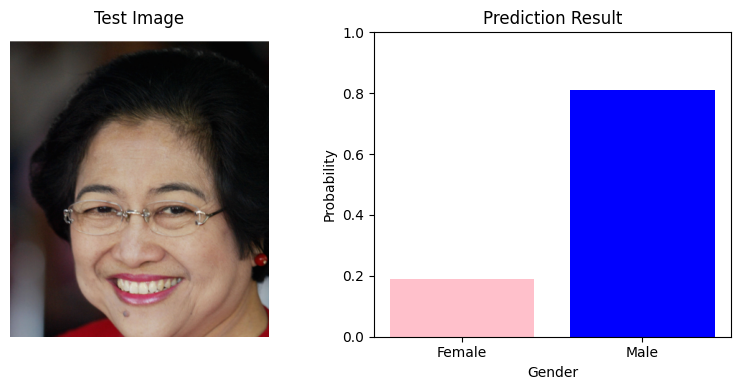

Model predicts: Male
Predictions: [[0.8113209]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


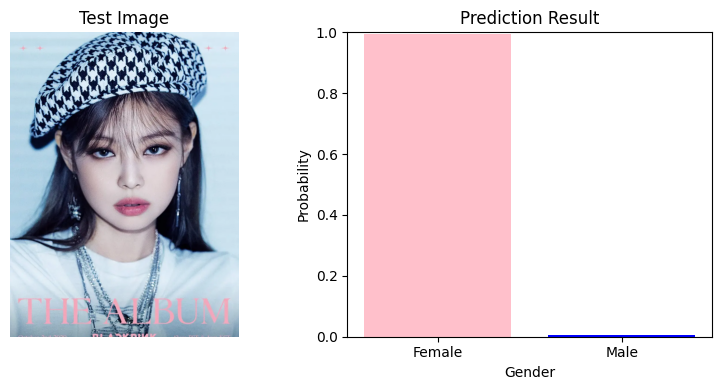

Model predicts: Female
Predictions: [[0.0042868]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


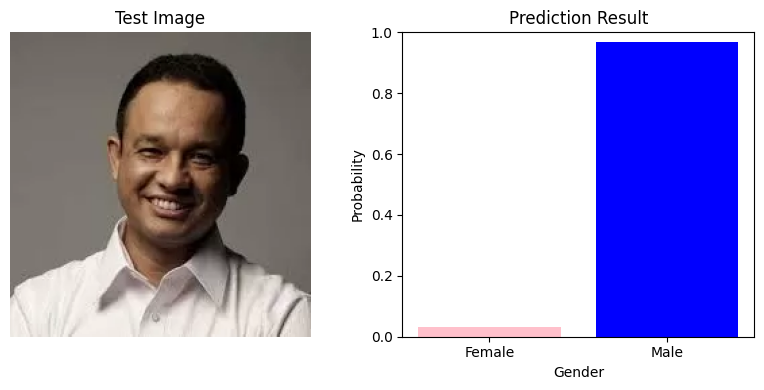

Model predicts: Male
Predictions: [[0.9695602]]


In [26]:
imgs = ['test/Puan_Maharani,_Ketua_DPR_RI_(cropped).jpg', 'test/4LZWLT0Y_400x400.jpg', 'test/Megawati_Soekarnoputri_2013.jpg', 'test/008460900_1626155956-jennie-blackpink.jpeg', 'test/1anis.jpg']

for img_path in imgs:
  img = image.load_img(img_path, target_size=(178, 218))
  img_array = image.img_to_array(img)
  img_array = np.expand_dims(img_array, axis=0)
  img_array = preprocess_input(img_array)


  prediction = keras_model.predict(img_array)
  if prediction[0][0] > 0.5:
    result = "Male"
  else:
    result = "Female"

  plt.figure(figsize=(8, 4))
  plt.subplot(1, 2, 1)
  img = Image.open(img_path)
  plt.imshow(img)
  plt.axis('off')
  plt.title('Test Image')
  plt.subplot(1, 2, 2)
  plt.bar(['Female', 'Male'], [1 - prediction[0][0], prediction[0][0]], color=['pink', 'blue'])
  plt.title('Prediction Result')
  plt.xlabel('Gender')
  plt.ylabel('Probability')
  plt.ylim([0, 1])
  plt.tight_layout()
  plt.show()
  print(f"Model predicts: {result}")
  print(f"Predictions: {prediction}")